### Построение признаков


2. Практическая часть:
    - Feature Enginering

### Обзор методов

- линейные
- нелинейные 
- эмбединги

Пример с линейной моделью

Набор данных взят отсюда - https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [2]:
path ='/gdrive/MyDrive/2_ver_actual Артем Зраев. 10.2020/Lection7/'

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
df = pd.read_csv(path + "kc_house_data.csv")
print(df.shape)
df.head(3)

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


В качестве предикторов (признаков) будем использовать  - bedrooms, sqft_living, sqft_lot и yr_built и еще немного

Целевая переменная - price (цена)

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
features = ["bedrooms","bathrooms" , "sqft_living", "sqft_lot", "yr_built", "floors","lat","long"]
target = "price"

#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], random_state=0)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

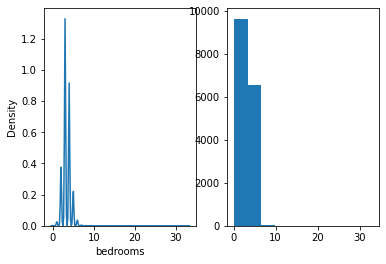

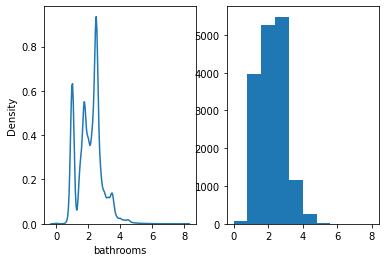

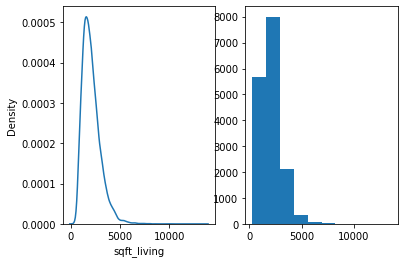

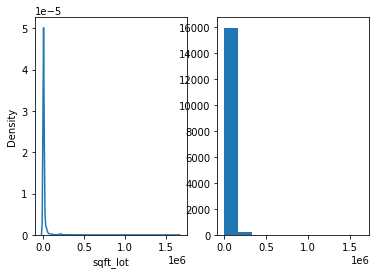

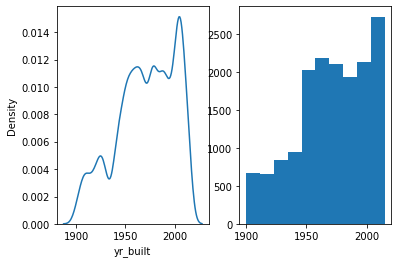

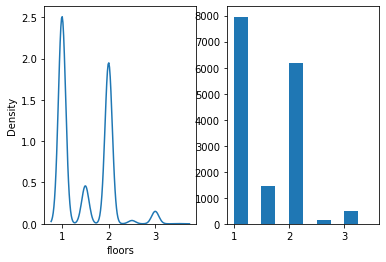

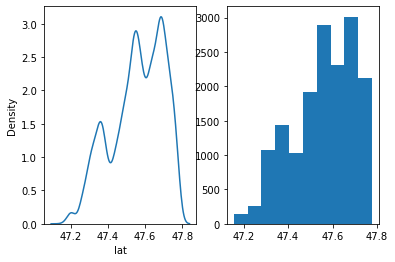

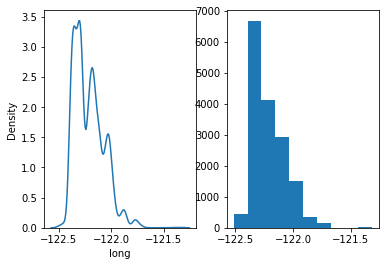

In [9]:
for name in features:
  plt.subplot(1,2,1)
  sns.kdeplot(X_train[name])
  plt.subplot(1,2,2)
  plt.hist(X_train[name])
  plt.show()

### **Простые и линейные действия**

In [10]:
#делим на блоки

Делим на блоки:
 - блоки одинакового размера
 - квартили
 - 

просто снижаем точность (делим на 10)

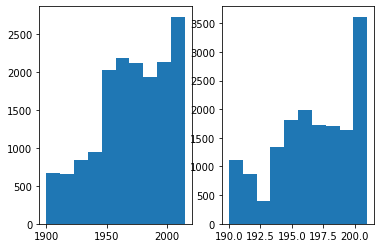

In [11]:
d = np.floor_divide( X_train['yr_built'], 10)
plt.subplot(1,2,1)
plt.hist(X_train['yr_built'])
plt.subplot(1,2,2)
plt.hist(d)
plt.show()

Разбиваем на интервалы

In [12]:
from sklearn.preprocessing import KBinsDiscretizer

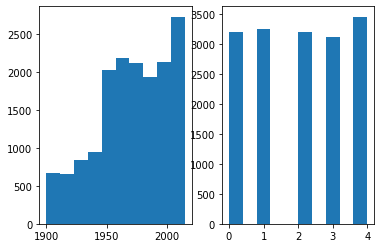

In [13]:
x_new = KBinsDiscretizer(n_bins=5, encode='ordinal').fit_transform(X_train['yr_built'].values.reshape(-1,1))
plt.subplot(1,2,1)
plt.hist(X_train['yr_built'])
plt.subplot(1,2,2)
plt.hist(x_new)
plt.show()

Строим квантили

In [14]:
X_train['yr_built'].quantile([0.25, 0.5, 0.75])

0.25    1951.0
0.50    1975.0
0.75    1997.0
Name: yr_built, dtype: float64

4 области

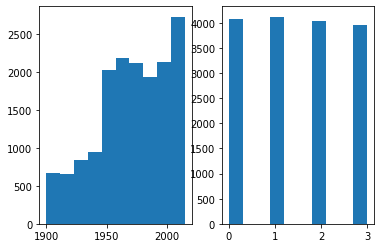

In [15]:
d4= pd.qcut(X_train['yr_built'], 4, labels=False)
plt.subplot(1,2,1)
plt.hist(X_train['yr_built'])
plt.subplot(1,2,2)
plt.hist(d4)
plt.show()

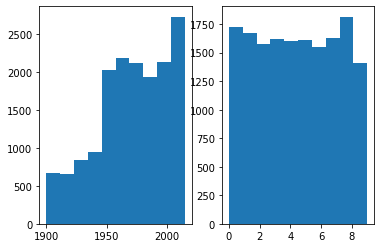

In [16]:
d10 =pd.qcut(X_train['yr_built'], 10, labels=False)
plt.subplot(1,2,1)
plt.hist(X_train['yr_built'])
plt.subplot(1,2,2)
plt.hist(d10)
plt.show()

In [17]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')

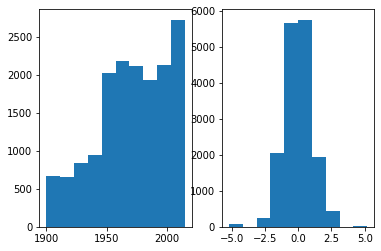

In [18]:
dq =qt.fit_transform(X_train['yr_built'].values.reshape(-1,1))
plt.subplot(1,2,1)
plt.hist(X_train['yr_built'])
plt.subplot(1,2,2)
plt.hist(dq)
plt.show()

Можно построить более точные границы

Логарифмические трансформации

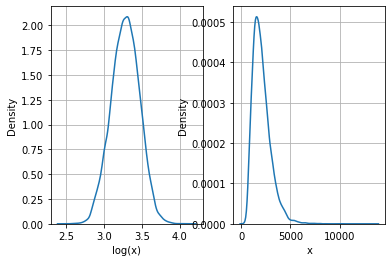

In [19]:
plt.subplot(1,2,1)
sns.kdeplot(np.log10(X_train['sqft_living'].values+1))
plt.xlabel('log(x)')
plt.grid('On')
plt.subplot(1,2,2)
sns.kdeplot((X_train['sqft_living'].values+1))
plt.xlabel('x')
plt.grid('On')
plt.show()

Бокс-Кокс 

In [20]:
from scipy import stats

парамтр для преобразования Бокса-Кокса:  0.030375517677652102


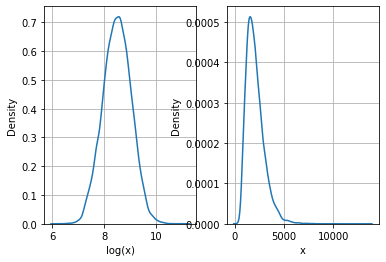

In [21]:
x_log, lyamb = stats.boxcox(  X_train['sqft_living']+1)

print('парамтр для преобразования Бокса-Кокса: ',lyamb)
plt.subplot(1,2,1)
sns.kdeplot(x_log)
plt.xlabel('log(x)')
plt.grid('On')
plt.subplot(1,2,2)
sns.kdeplot((X_train['sqft_living'].values))
plt.xlabel('x')
plt.grid('On')
plt.show()


Text(0.5, 1.0, 'box_Cox')

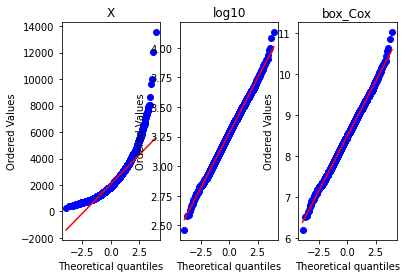

In [22]:
fig1, (ax1, ax2, ax3) = plt.subplots(1,3)

p3 = stats.probplot(x_log, dist=stats.norm, plot=ax3)
p1 = stats.probplot(X_train['sqft_living'], dist=stats.norm, plot=ax1)
p2 = stats.probplot(np.log10(X_train['sqft_living']), dist=stats.norm, plot=ax2)
ax1.set_title('X')
ax2.set_title('log10')
ax3.set_title('box_Cox')

In [23]:
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures


In [24]:
pT = PowerTransformer( method='box-cox')


In [25]:
x_new = pT.fit_transform(X_train.loc[:,['bathrooms','sqft_living']]+1)
x_new

array([[-1.57020105, -1.58789344],
       [-0.41921912, -0.5429353 ],
       [ 0.24407926, -0.30857084],
       ...,
       [ 0.24407926,  0.50178194],
       [-0.07911837,  0.51174317],
       [ 0.24407926,  0.52166375]])

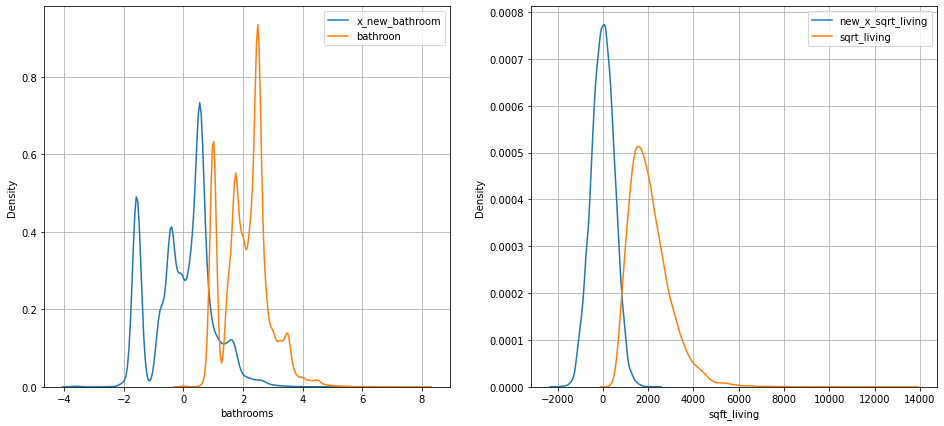

In [27]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.kdeplot(x_new[:,0],label = 'x_new_'+'bathroom')
sns.kdeplot(X_train['bathrooms'].values, label = 'bathroon')
plt.xlabel('bathrooms')
plt.legend()
plt.grid('On')
plt.subplot(1,2,2)
sns.kdeplot(x_new[:,1]*500, label = 'new_x_'+'sqrt_living')
sns.kdeplot((X_train['sqft_living'].values), label = 'sqrt_living')
plt.xlabel('sqft_living')
plt.legend()
plt.grid('On')
plt.show()

Полиномиальная модель

на входе: 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mo stretchy="false">(</mo>
  <msub>
    <mi>X</mi>
    <mn>1</mn>
  </msub>
  <mo>,</mo>
  <msub>
    <mi>X</mi>
    <mn>2</mn>
  </msub>
  <mo stretchy="false">)</mo>
</math>
на выходе : 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>,</mo>
  <msub>
    <mi>X</mi>
    <mn>1</mn>
  </msub>
  <mo>,</mo>
  <msub>
    <mi>X</mi>
    <mn>2</mn>
  </msub>
  <mo>,</mo>
  <msubsup>
    <mi>X</mi>
    <mn>1</mn>
    <mn>^2</mn>
  </msubsup>
  <mo>,</mo>
  <msub>
    <mi>X</mi>
    <mn>1</mn>
  </msub>
  <msub>
    <mi>X</mi>
    <mn>2</mn>
  </msub>
  <mo>,</mo>
  <msubsup>
    <mi>X</mi>
    <mn>2</mn>
    <mn>^2</mn>
  </msubsup>
  <mo stretchy="false">)</mo>
</math>

In [28]:
pL = PolynomialFeatures( degree=2)

In [29]:
x_new = pL.fit_transform(X_train.loc[:,['bathrooms','sqft_living']])
x_new

array([[1.0000e+00, 1.0000e+00, 9.6000e+02, 1.0000e+00, 9.6000e+02,
        9.2160e+05],
       [1.0000e+00, 1.7500e+00, 1.5100e+03, 3.0625e+00, 2.6425e+03,
        2.2801e+06],
       [1.0000e+00, 2.2500e+00, 1.6700e+03, 5.0625e+00, 3.7575e+03,
        2.7889e+06],
       ...,
       [1.0000e+00, 2.2500e+00, 2.3600e+03, 5.0625e+00, 5.3100e+03,
        5.5696e+06],
       [1.0000e+00, 2.0000e+00, 2.3700e+03, 4.0000e+00, 4.7400e+03,
        5.6169e+06],
       [1.0000e+00, 2.2500e+00, 2.3800e+03, 5.0625e+00, 5.3550e+03,
        5.6644e+06]])

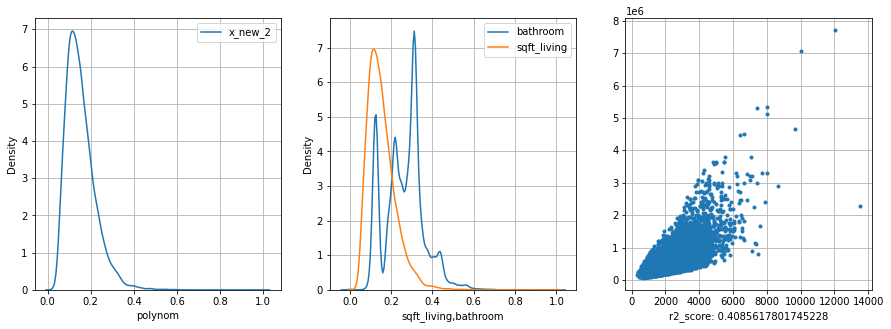

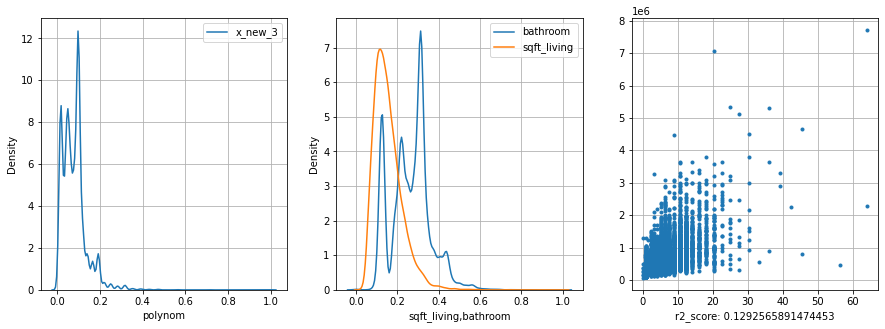

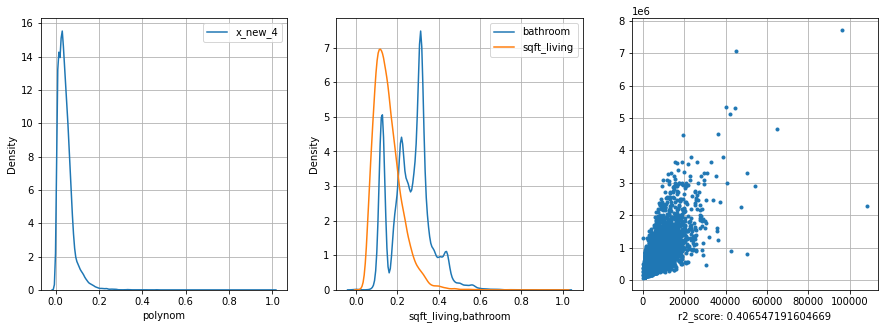

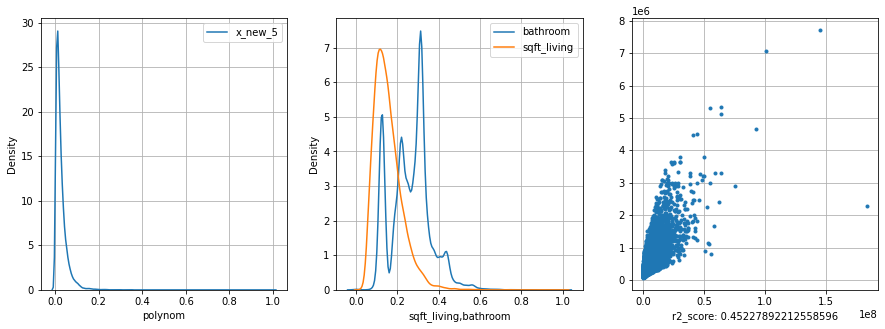

In [31]:

for i in range(2,x_new.shape[1]):
  plt.figure(figsize = (15,5))
  plt.subplot(1,3,1)
  sns.kdeplot(x_new[:,i]/np.max(x_new[:,i]), label = 'x_new_'+str(i))
  plt.xlabel('polynom')
  plt.legend()
  plt.grid('On')
  plt.subplot(1,3,2)

  sns.kdeplot(X_train['bathrooms'].values/np.max(X_train['bathrooms'].values), label = 'bathroom')
  sns.kdeplot((X_train['sqft_living'].values/np.max(X_train['sqft_living'].values)), label = 'sqft_living')
  plt.xlabel('sqft_living,bathroom')
  plt.legend()
  plt.grid('On')

  plt.subplot(1,3,3)
  plt.plot(x_new[:,i],y_train,'.')

  sY = StandardScaler().fit_transform( y_train.values.reshape(-1, 1))
  sX = StandardScaler().fit_transform( x_new[:,i].reshape(-1, 1))

  r2_ = r2_score(sY,sX)
  plt.xlabel('r2_score: '+str(r2_))
  plt.grid('On')
  plt.title('оценка связи') 
  plt.show()  




### **Эмбединги**

Ядерные трансформы (RBF функции)

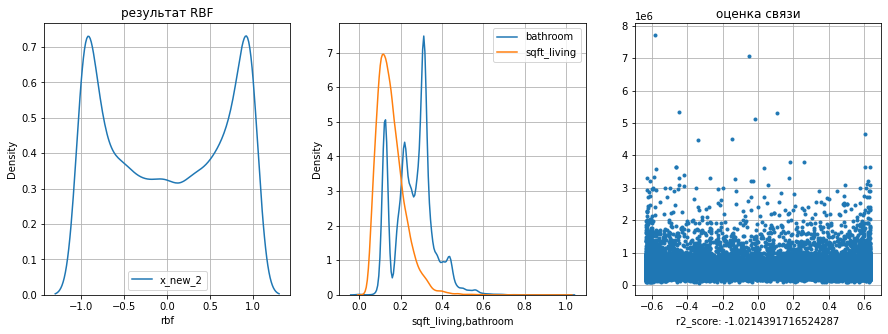

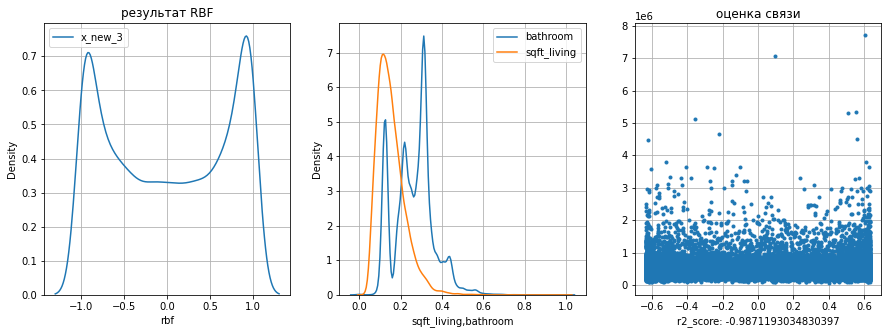

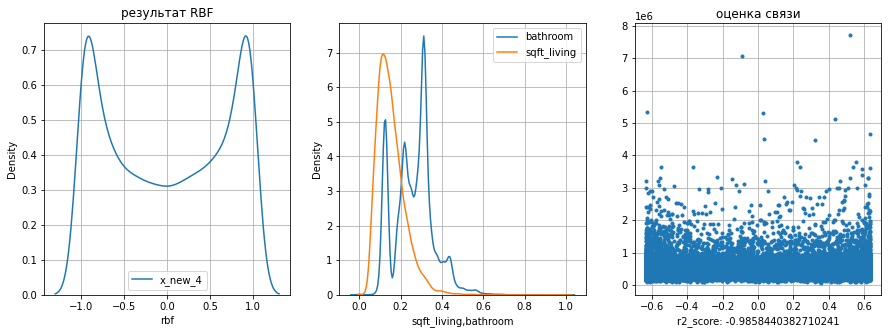

In [33]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.feature_extraction import FeatureHasher
features

ps =  RBFSampler(gamma=5, n_components=5)
x_new = ps.fit_transform(X_train.loc[:,features])#['bathrooms','sqft_living']])



for i in range(2,x_new.shape[1]):
  plt.figure(figsize = (15,5))
  plt.subplot(1,3,1)
  sns.kdeplot(x_new[:,i]/np.max(x_new[:,i]), label = 'x_new_'+str(i))
  plt.xlabel('rbf')
  plt.grid('On')
  plt.title('результат RBF')
  plt.legend()
  plt.subplot(1,3,2)

  sns.kdeplot(X_train['bathrooms'].values/np.max(X_train['bathrooms'].values), label = 'bathroom')
  sns.kdeplot((X_train['sqft_living'].values/np.max(X_train['sqft_living'].values)), label = 'sqft_living')
  plt.xlabel('sqft_living,bathroom')
  plt.legend()
  plt.grid('On')

  plt.subplot(1,3,3)
  plt.plot(x_new[:,i],y_train,'.')

  sY = StandardScaler().fit_transform( y_train.values.reshape(-1, 1))
  sX = StandardScaler().fit_transform( x_new[:,i].reshape(-1, 1))

  r2_ = r2_score(sY,sX)
  plt.xlabel('r2_score: '+str(r2_))
  plt.grid('On') 
  plt.title('оценка связи') 
  plt.show()  

Главные компоненты

In [35]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [36]:

linear_pca = PCA(n_components=2)


x_new = linear_pca.fit_transform(X_train.loc[:,features])


In [37]:


kernel_pca = KernelPCA(n_components=2)

x_new = linear_pca.fit_transform(X_train.loc[:,features])


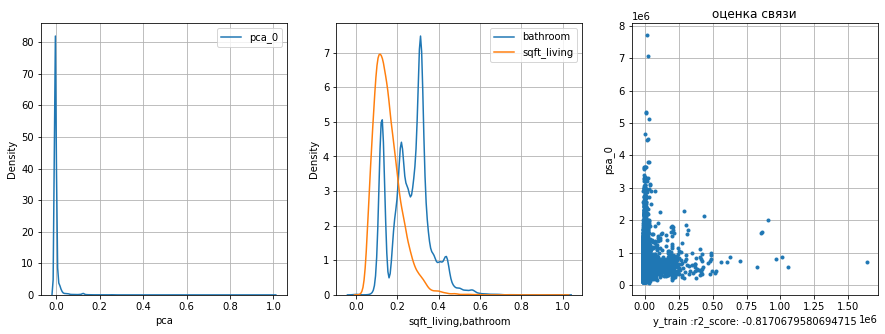

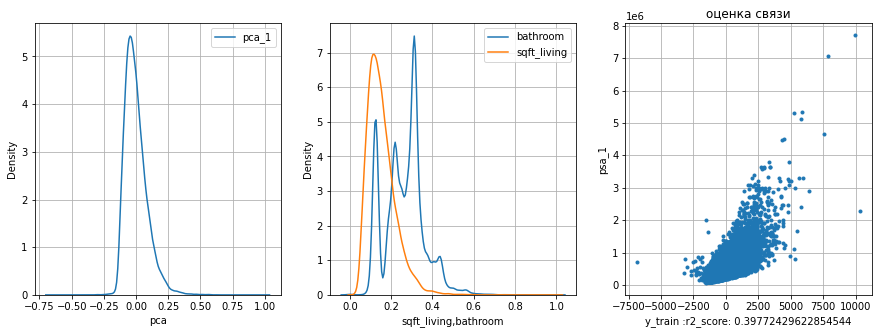

In [40]:

for i in range(x_new.shape[1]):
  plt.figure(figsize = (15,5))
  plt.subplot(1,3,1)
  sns.kdeplot(x_new[:,i]/np.max(x_new[:,i]), label = 'pca_'+str(i))
  plt.xlabel('pca')
  plt.grid('On')
  plt.legend()
  plt.subplot(1,3,2)

  sns.kdeplot(X_train['bathrooms'].values/np.max(X_train['bathrooms'].values),label = 'bathroom')
  sns.kdeplot((X_train['sqft_living'].values/np.max(X_train['sqft_living'].values)), label ='sqft_living' )
  plt.xlabel('sqft_living,bathroom')
  plt.legend()
  plt.grid('On')  

  plt.subplot(1,3,3)
  plt.plot(x_new[:,i],y_train,'.')

  sY = StandardScaler().fit_transform( y_train.values.reshape(-1, 1))
  sX = StandardScaler().fit_transform( x_new[:,i].reshape(-1, 1))

  r2_ = r2_score(sY,sX)
  plt.xlabel('y_train :'+'r2_score: '+str(r2_))
  plt.ylabel('psa_'+str(i))

  plt.grid('On')
  plt.title('оценка связи') 
  plt.show()

In [42]:
from sklearn.manifold import LocallyLinearEmbedding

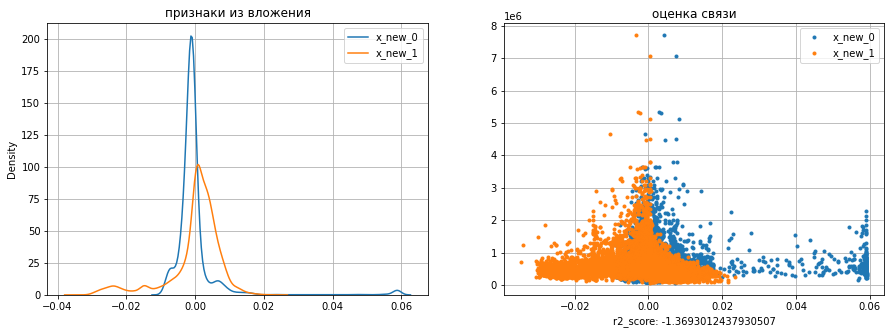

In [48]:
embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=10) # скрытое пространство размера 2
x_new = embedding.fit_transform(X_train)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
for i in range(x_new.shape[1]):
  sns.kdeplot(x_new[:,i], label = 'x_new_'+str(i))
plt.grid('On')
plt.legend()
plt.title('признаки из вложения')
plt.subplot(1,2,2)
for i in range(x_new.shape[1]):
  plt.plot(x_new[:,i],y_train,'.', label = 'x_new_'+str(i))

sY = StandardScaler().fit_transform( y_train.values.reshape(-1, 1))
sX = StandardScaler().fit_transform( x_new[:,i].reshape(-1, 1))

r2_ = r2_score(sY,sX)
plt.xlabel('r2_score: '+str(r2_))
plt.legend()
plt.grid('On') 
plt.title('оценка связи') 

plt.show()

In [49]:
from scipy.spatial import Voronoi, voronoi_plot_2d

def kmeans_voronoi_plot(X, y, cluster_centers, ax):
  """Plots the Voronoi diagram of the k-means clusters overlaid with the data"""
  ax.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', alpha=0.2)
  vor = Voronoi(cluster_centers)
  voronoi_plot_2d(vor, ax=ax, show_vertices=False, alpha=0.5)

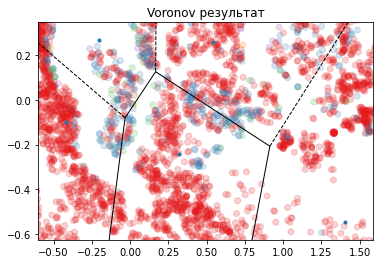

In [52]:
from sklearn.cluster import KMeans

stx = StandardScaler().fit(X_train)

kmeans = KMeans(n_clusters=5, random_state=0).fit(stx.transform(X_train))
x_new = kmeans.predict(stx.transform(X_train))

fig,(ax1) = plt.subplots(1,1)
kmeans_voronoi_plot(stx.transform(X_train)[:,[7,6]], y_train, kmeans.cluster_centers_[:,[7,6]], ax1)
plt.title('Voronov результат')
plt.show()





[[6.2490684  4.68028677 3.69534191 4.84649615 7.22960694]
 [4.27705915 1.89536939 1.78051603 3.32439896 7.30155639]
 [3.96748121 1.67300276 1.91825688 3.03197806 7.3492436 ]]


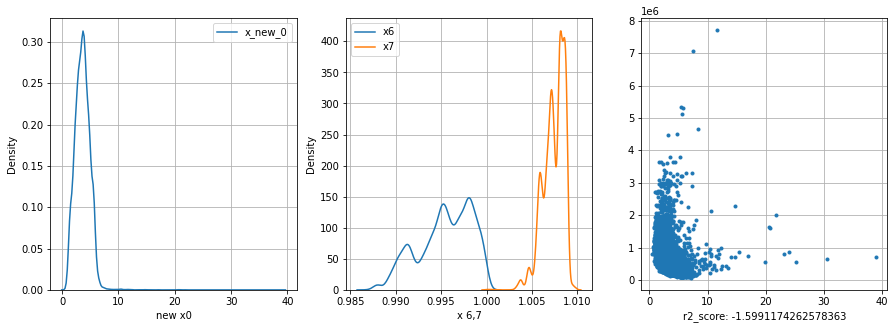

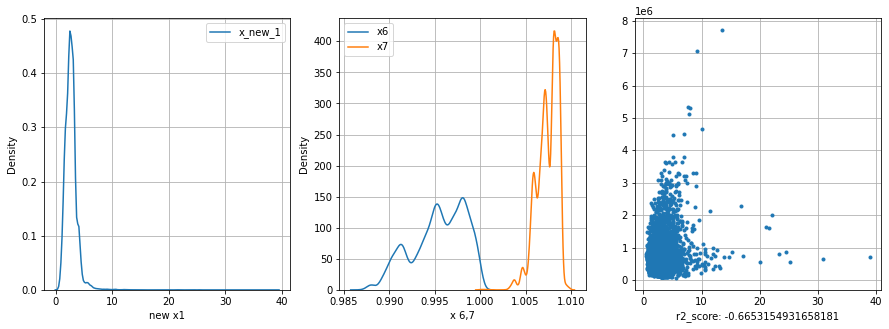

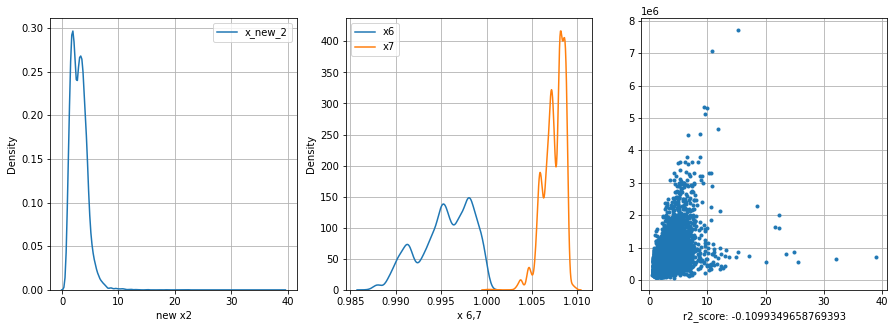

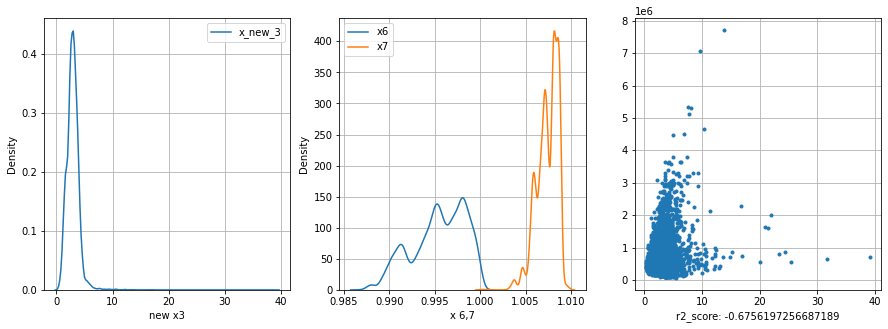

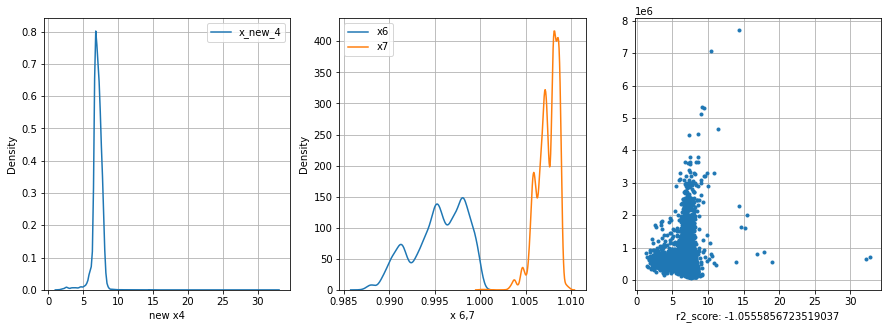

In [53]:
x_new = kmeans.transform(stx.transform(X_train))
print(x_new[:3,:])

for i in range(x_new.shape[1]):
  plt.figure(figsize = (15,5))
  plt.subplot(1,3,1)
  sns.kdeplot(x_new[:,i], label = 'x_new_'+str(i))
  plt.xlabel('new x'+str(i))
  plt.legend()
  plt.grid('On')
  plt.subplot(1,3,2)

  sns.kdeplot(X_train.values[:,6]/np.max(X_train.values[:,6]))
  sns.kdeplot(X_train.values[:,7]/np.max(X_train.values[:,7]))
  plt.legend(['x6','x7'])
  plt.grid('On')
  plt.xlabel('x 6,7')

  plt.subplot(1,3,3)
  plt.plot(x_new[:,i],y_train,'.')

  sY = StandardScaler().fit_transform( y_train.values.reshape(-1, 1))
  sX = StandardScaler().fit_transform( x_new[:,i].reshape(-1, 1))

  r2_ = r2_score(sY,sX)
  plt.xlabel('r2_score: '+str(r2_))
  plt.grid('On')
  plt.show()

### **Хеширование**

[[ 1. -1.  0.]
 [-1. -1.  0.]
 [ 0. -2.  2.]]


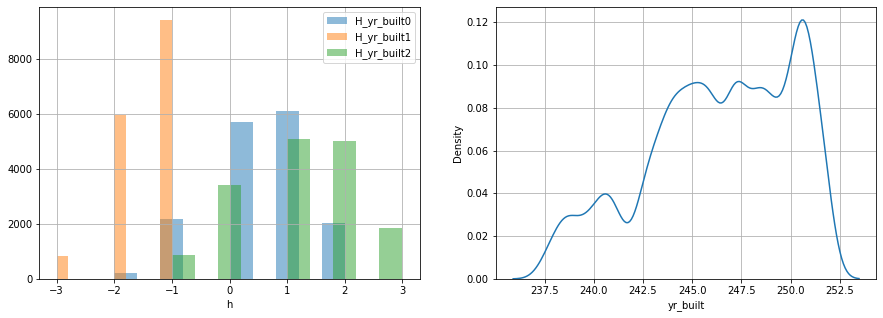

In [54]:

features

ps =  FeatureHasher( n_features=3,input_type='string' )
x_new = ps.fit_transform(X_train.loc[:,'yr_built'].astype(str)).toarray()#
print(x_new[:3,:])

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.grid('On')
for i in range(x_new.shape[1]):
  
  
  plt.hist(x_new[:,i], alpha = 0.5, label = 'H_yr_built'+str(i))
plt.xlabel('h')
plt.legend()
plt.subplot(1,2,2)

sns.kdeplot(X_train['yr_built'].values/np.max(X_train['bathrooms'].values))
plt.grid('On')  
plt.xlabel('yr_built')

  
plt.show()  

Много всего другого

## Pipeline

Соберем пайплайн

In [55]:
#соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

class NumericPower(BaseEstimator, TransformerMixin):
    def __init__(self, key, p):
        self.key = key
        self.columns = []
        self.p = p+1

    def fit(self, X, y=None):
        #self.columns = [self.key+'^'+str(col) for col in range(2,self.p)]
        return self

    def transform(self, X):
        Xp = X.copy()
       
        for i in range(2,self.p):
          self.columns += [self.key+'^'+str(i)]
          Xp[self.key+'^'+str(i)] = Xp[self.key].values ** i
        
        return Xp.loc[:,self.columns]
    
class Numericlog(BaseEstimator, TransformerMixin):
    def __init__(self, key, p):
        self.key = key
        self.columns = []
        self.p = p+1

    def fit(self, X, y=None):
        #self.columns = [self.key+'log_'+str(col) for col in range(2,self.p)]
        return self

    def transform(self, X):
        Xp = X.copy()
       
        for i in range(2,self.p):
          self.columns += [self.key+'log_'+str(i)]
          Xp[self.key+'log_'+str(i)] = np.log(np.abs(Xp[self.key].values)+0.01)/np.log(i)

        return Xp.loc[:,self.columns]

class NumericMix(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []
        

    def fit(self, X, y=None):
        return self

    def transform(self, X):

        Xp = X[self.key].copy()
        #print(Xp)
        s = self.key
        for col1 in s[:-1]:
          for col2 in s[1:]:
            #print(col1+'/'+col2)
            
            Xp[col1+'/'+col2] = Xp.loc[:,col1].values/(np.abs(Xp.loc[:,col2].values)+0.01)
            
            Xp[col1+'*'+col2] = Xp.loc[:,col1].values*Xp.loc[:,col2].values
            self.columns += [col1+'/'+col2, col1+'*'+col2]
            #print(self.columns)
        return Xp.loc[:,self.columns]

class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]
    

    
continuous_columns = ["bedrooms", "yr_built", 'sqft_living', 'sqft_lot']
final_transformers = list()
    
for cont_col in continuous_columns:
    cont_transformer = Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('scaler', StandardScaler())
            ])
    final_transformers.append((cont_col, cont_transformer))
    
feats = FeatureUnion(final_transformers)

feature_processing = Pipeline([('feats', feats)])

In [56]:
Numb_power = Pipeline([
                ('selector', NumberSelector(key=continuous_columns[0])),
                ('scaler', NumericPower(key=continuous_columns[0], p=3))
                ])
NN = Numb_power.fit_transform(X_train)
print(NN.shape)
NN.head()

(16209, 2)


,bedrooms^2,bedrooms^3
1956,1,1
15678,9,27
8729,9,27
19064,9,27
11291,9,27


In [57]:
Numb_log = Pipeline([
                ('selector', NumberSelector(key=continuous_columns[0])),
                ('scaler', Numericlog(key=continuous_columns[0], p=3))
                ])
NN = Numb_log.fit_transform(X_train)
print(NN.shape)
NN.head()

(16209, 2)


,bedroomslog_2,bedroomslog_3
1956,0.014355,0.009057
15678,1.589763,1.003029
8729,1.589763,1.003029
19064,1.589763,1.003029
11291,1.589763,1.003029


In [58]:
Numb_transformer = Pipeline([ ('scaler', NumericMix(key=continuous_columns))])
NN = Numb_transformer.fit_transform(X_train)
print(NN.shape)
NN.head()

(16209, 18)


,bedrooms/yr_built,bedrooms*yr_built,bedrooms/sqft_living,bedrooms*sqft_living,bedrooms/sqft_lot,bedrooms*sqft_lot,yr_built/yr_built,yr_built*yr_built,yr_built/sqft_living,yr_built*sqft_living,yr_built/sqft_lot,yr_built*sqft_lot,sqft_living/yr_built,sqft_living*yr_built,sqft_living/sqft_living,sqft_living*sqft_living,sqft_living/sqft_lot,sqft_living*sqft_lot
1956,0.000514,1945,0.001042,960,0.000024,40946,0.999995,3783025,2.026021,1867200,0.047502,79639970,0.493571,1867200,0.999990,921600,0.023446,39308160
15678,0.001540,5844,0.001987,4530,0.000309,29160,0.999995,3794704,1.290058,2941480,0.200411,18934560,0.775150,2941480,0.999993,2280100,0.155350,14677200
8729,0.001530,5883,0.001796,5010,0.000468,19242,0.999995,3845521,1.174244,3274870,0.305737,12577854,0.851602,3274870,0.999994,2788900,0.260368,10711380
19064,0.001527,5892,0.001128,7980,0.000016,576297,0.999995,3857296,0.738343,5224240,0.010224,377282436,1.354372,5224240,0.999996,7075600,0.013847,510983340
11291,0.001517,5934,0.001775,5070,0.000222,40500,0.999995,3912484,1.170407,3342820,0.146518,26703000,0.854394,3342820,0.999994,2856100,0.125185,22815000


Модель - линейная регрессия

In [61]:
regressor = Pipeline([
    ('features',feats),
    ('regressor', LinearRegression()),
])

In [63]:
#обучим наш пайплайн
regressor.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('features',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('bedrooms',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  NumberSelector(key='bedrooms')),
                                                                 ('scaler',
                                                                  StandardScaler(copy=True,
                                                                                 with_mean=True,
                                                                                 with_std=True))],
                                                          verbose=False)),
                                                ('yr_built',
                                                 Pipeline(memory=None,
                          

Посчитаем MAE и коэффициент детерминации (R2)

In [64]:
predictions =  regressor.predict(X_test)
 
mean_absolute_error(y_pred=predictions, y_true=y_test), r2_score(y_pred=predictions, y_true=y_test)

(162462.49573861936, 0.5365765901167386)

mae малоинформативен, но вот r2 - очень понятен.

На случай, если кто забыл:

![r2](r2.png "R2 score")

In [65]:
intercept = regressor[1].intercept_
features = pd.DataFrame(regressor[1].coef_, 
                        continuous_columns, 
                        columns=['coefficient'])
features.head()

,coefficient
bedrooms,-55705.016661
yr_built,-71039.334129
sqft_living,316113.766523
sqft_lot,-14820.959494


Как это можно интерпретировать:

1. sqft_living имеет наибольшую важность и положителен (чем выше жилая площадь, тем выше стоимость)
2. остальные признаки уже идут с отрицательным весом
3. вторым по важности признаком является год постройки (yr_built)